<a href="https://colab.research.google.com/github/arroyoyo1/Analysis-of-a-Supermarket/blob/main/An%C3%A1lisis_de_un_Supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Financial Analysis
This notebook presents a financial analysis of the supermarket, considering the estimated sales needed to cover operating expenses, including payroll, electricity and water. It also adjusts for electricity expenses because the supermarket operates 24 hours a day.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, zscore

# Load the CSV file
df = pd.read_csv("SuperMarketData.csv")

## Sales analysis
Sales are first normalized to fit the data to a beta distribution and then the relevant statistics are calculated.

In [2]:
# Multiply sales by 19.88 to convert to MXN and normalize
sales = np.array(df["Sales"]) * 19.88
max_sales, min_sales = sales.max(), sales.min()
sales_norm = (sales - min_sales) / (max_sales - min_sales)

# Fit sales data to a beta distribution
a, b, _, _ = beta.fit(sales)
print(f"Alpha and Beta: {a:.4f}, {b:.4f}")

# Calculate normalized mean, variance, and standard deviation
mu_xnorm = a / (a + b)
var_xnorm = a * b / ((a + b)**2 * (a + b + 1))
sigma_xnorm = np.sqrt(var_xnorm)
print(f"Normalized mean, variance, and standard deviation: {mu_xnorm:.4f}, {var_xnorm:.4f}, {sigma_xnorm:.4f}")

# Transform back to the original sales values
mu = mu_xnorm * (max_sales - min_sales) + min_sales
var = var_xnorm * (max_sales - min_sales) ** 2
sigma = np.sqrt(var)
print(f"Sales mean, variance, and standard deviation: {mu:.4f}, {var:.4f}, {sigma:.4f}")

Alpha and Beta: 1.0343, 2.9124
Normalized mean, variance, and standard deviation: 0.2621, 0.0391, 0.1977
Sales mean, variance, and standard deviation: 5588.8462, 16454341.4852, 4056.3951


## Calculation of Operating Expenses
Payroll calculations, electricity costs considering 24-hour operation, and water costs are included.

In [18]:
# Calculate operational expenses
operating_days = 24
factor = 1.15  # 15% increase factor

# Define salaries and number of employees per role
expenses_by_role = {
    "cashiers": {"salary": 258.25, "num_employees": 30, "days": operating_days, "adjust": True},
    "janitors": {"salary": 5000, "num_employees": 20, "days": 1, "adjust": True},
    "manager": {"salary": 100000, "num_employees": 1, "days": 1, "adjust": False},
    "assistant_managers": {"salary": 45000, "num_employees": 4, "days": 1, "adjust": False},
    "warehouse_staff": {"salary": 262.13, "num_employees": 40, "days": operating_days, "adjust": True},
    "aisle_staff": {"salary": 264.65, "num_employees": 40, "days": operating_days, "adjust": True}
}

# Calculate total payroll with a 15% adjustment where applicable
total_payroll = sum(
    data["salary"] * data["num_employees"] * data["days"] * (factor if data["adjust"] else 1)
    for data in expenses_by_role.values()
)
print(f"Payroll expenses: {total_payroll:.2f}")

# Electricity expenses (assuming the supermarket operates 24 hours a day for refrigeration)
electricity_expenses = 120 * 2000 * 12 * 2.3 * 30  # 24/7 operation
print(f"Electricity expenses: {electricity_expenses:.2f}")

# Water expenses
water_expenses = 2000 * 30 * 19.88  # Assuming $2,000 per month
print(f"Water expenses: {water_expenses:.2f}")

# Total operating expenses
operating_expenses = total_payroll + electricity_expenses + water_expenses
print(f"Total operating expenses: {operating_expenses:.2f}")

Payroll expenses: 1190396.12
Electricity expenses: 198720000.00
Water expenses: 1192800.00
Total operating expenses: 201103196.12


## Estimating the Number of Sales
Using the statistics calculated above, we estimate how many sales are needed to cover operating expenses and still earn 1.5 million pesos, and calculate the percentage of the population we should retain as customers.

In [20]:
# Income and population estimation
income = operating_expenses + 1500000
omega = norm.ppf(0.01)

# Coefficients for quadratic equation
a_ = mu ** 2
b_ = -2 * mu * income - omega ** 2 * sigma ** 2
c_ = income ** 2

# Solve quadratic equation for N1 and N2
N1 = (-b_ + np.sqrt(b_ ** 2 - 4 * a_ * c_)) / (2 * a_)
N2 = (-b_ - np.sqrt(b_ ** 2 - 4 * a_ * c_)) / (2 * a_)

# Select the correct solution
N = N1 if (income / N1 - mu) > 0 else N2
print(f"Solution N (Number of necessary sales): {N:.2f}")

# Percentage of the population
pop_percentage = N / 160000000
print(f"Percentage of the population: {pop_percentage:.4f}")

Solution N (Number of necessary sales): 29053543.97
Percentage of the population: 0.1816


## Distribution of Ratings
A histogram representing the distribution of supermarket customer ratings is displayed.

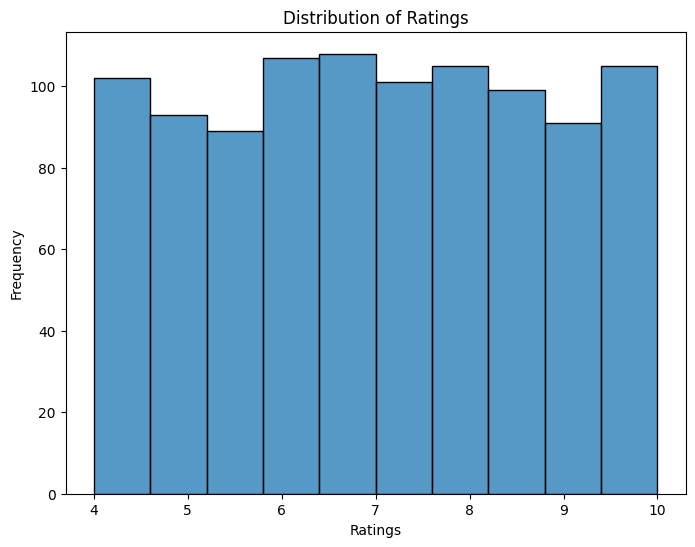

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()